## Jialin Shi  --  Breast Cancer Diagnosis

### k-means clustering
##### Method:
Compute the centers of the two clusters.
Find the closest 30 data points to each cluster center.    
i. Read the true labels of those 30 data points and take a majority poll.        
               Label them by majority poll and compare with the true labels.    
ii. Classify test data based on their proximity to the centers of the clusters.    
iii. Spectral Clustering


###### Monte Carlo Simulation
te_accuray : 0.881    
te_precision : 0.793    
te_recall : 0.843    
te_roc : 0.843    
te_fscore : 0.863    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split  # split data for training and testing
from sklearn.preprocessing import StandardScaler      # standardScaler,uniformed
from sklearn.metrics import confusion_matrix                         
from sklearn.metrics import accuracy_score  
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import calinski_harabaz_score
from sklearn.metrics import hamming_loss
from sklearn.preprocessing import Normalizer
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import SpectralClustering

In [2]:
# (a) Load the Vertebral Column Data Set from
# Benign=B-neg, Malignant=M-pos
df= pd.read_csv('wdbc.data.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Unsupervised Learning

In [33]:
#split data into train and test
pos_train,pos_test=train_test_split(pos,test_size=0.2,random_state=42)
pos_trainx=pos_train.iloc[:,2:]
pos_trainy=pos_train.iloc[:,1]
pos_testx=pos_test.iloc[:,2:]
pos_testy=pos_test.iloc[:,1]

neg_train,neg_test=train_test_split(neg,test_size=0.2,random_state=42)
neg_trainx=neg_train.iloc[:,2:]
neg_trainy=neg_train.iloc[:,1]
neg_testx=neg_test.iloc[:,2:]
neg_testy=neg_test.iloc[:,1]

#concat
testx=pd.concat([pos_testx,neg_testx])
testy=pd.concat([pos_testy,neg_testy])
trainx=pd.concat([pos_trainx,neg_trainx])
trainy=pd.concat([pos_trainy,neg_trainy])

# Normalize data
transformer = Normalizer().fit(trainx)
trainx=transformer.transform(trainx)
testx=transformer.transform(testx)


In [34]:
# k-means
km = KMeans(n_clusters=2,random_state=1)
km = km.fit(trainx)
label=km.labels_

In [35]:
km.predict(trainx)

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [36]:
# find closest 30 data points to each cluster center.
a=pd.DataFrame(km.transform(trainx))
close_0=a.iloc[:,0].sort_values().index.tolist()[0:30]
close_1=a.iloc[:,1].sort_values().index.tolist()[0:30]

In [37]:
# Majority poll for true label 0-M,1-B
trainy=pd.DataFrame(trainy)
c_0=trainy.loc[close_0,:]
majority=c_0.groupby(1).size()
majority

1
B     9
M    13
dtype: int64

In [38]:
if majority["B"]> majority["M"]:
    c0='B'
    print("0: B")
else:
    c0='M'
    print("0: M")

0: M


In [39]:
c_1=trainy.loc[close_1,:]
majority=c_1.groupby(1).size()
if majority["B"]> majority["M"]:
    c1='B'
    print("c_1: B")
else:
    c1='M'
    print("c_1: M")

c_1: B


In [40]:
assign=pd.DataFrame(label).replace({0:c0,1:c1})

In [41]:
# make it binary
trainy=trainy.replace({'M':1,'B':-1})
assign=assign.replace({'M':1,'B':-1})

print('accracy:',1-hamming_loss(trainy, assign))
print('precision:',average_precision_score(trainy, assign))
print('recall:',recall_score(trainy, assign, average='macro'))
print('fscore:',f1_score(trainy, assign, average='macro'))
print('auc',roc_auc_score(trainy, assign))


accracy: 0.8810572687224669
precision: 0.7932482938644178
recall: 0.8438492681407661
fscore: 0.8632072313357884
auc 0.843849268140766


In [42]:
confusion_matrix(trainy, assign)

array([[282,   3],
       [ 51, 118]])


for train auc:


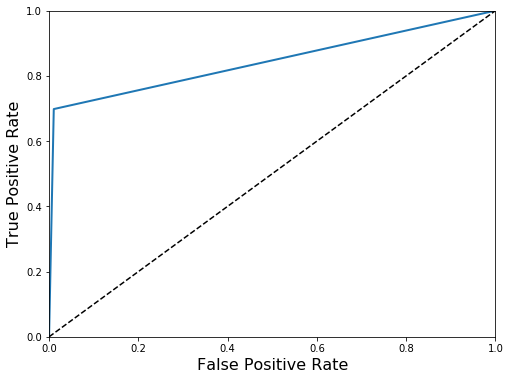

In [43]:
fpr, tpr, thresholds = roc_curve(trainy, assign)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
print('\nfor train auc:')
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

###### Monte Carlo m=30

In [44]:
te_accuray=[]
te_precision=[]
te_recall=[]
te_roc=[]
te_fscore=[]

for i in range(30):
    #split data into train and test
    pos_train,pos_test=train_test_split(pos,test_size=0.2,random_state=42)
    pos_trainx=pos_train.iloc[:,2:]
    pos_trainy=pos_train.iloc[:,1]
    pos_testx=pos_test.iloc[:,2:]
    pos_testy=pos_test.iloc[:,1]

    neg_train,neg_test=train_test_split(neg,test_size=0.2,random_state=42)
    neg_trainx=neg_train.iloc[:,2:]
    neg_trainy=neg_train.iloc[:,1]
    neg_testx=neg_test.iloc[:,2:]
    neg_testy=neg_test.iloc[:,1]

    #concat
    testx=pd.concat([pos_testx,neg_testx])
    testy=pd.concat([pos_testy,neg_testy])
    trainx=pd.concat([pos_trainx,neg_trainx])
    trainy=pd.concat([pos_trainy,neg_trainy])

    # Normalize data
    transformer = Normalizer().fit(trainx)
    trainx=transformer.transform(trainx)
    testx=transformer.transform(testx)
    
    km = KMeans(n_clusters=2)
    km = km.fit(trainx)
    label=km.labels_
    
    # find closest 30 data points to each cluster center.
    a=pd.DataFrame(km.transform(trainx))
    close_0=a.iloc[:,0].sort_values().index.tolist()[0:30]
    close_1=a.iloc[:,1].sort_values().index.tolist()[0:30]
    
    # Majority poll for true label 0-M,1-B
    trainy=pd.DataFrame(trainy)
    c_0=trainy.loc[close_0,:]
    majority=c_0.groupby(1).size()
    if majority["B"]> majority["M"]:
        c0='B'
    else:
        c0='M'
        
    c_1=trainy.loc[close_1,:]
    majority=c_1.groupby(1).size()
    if majority["B"]> majority["M"]:
        c1='B'
    else:
        c1='M'
        
        
    assign=pd.DataFrame(label).replace({0:c0,1:c1})
    trainy=trainy.replace({'M':1,'B':-1})
    assign=assign.replace({'M':1,'B':-1})
    
    te_accuray.append(1-hamming_loss(trainy, assign))
    te_precision.append(average_precision_score(trainy, assign))
    te_recall.append(recall_score(trainy, assign, average='macro'))
    te_fscore.append(f1_score(trainy, assign, average='macro'))
    te_roc.append(roc_auc_score(trainy, assign))

print('te_accuray :',np.mean(te_accuray))
print('te_precision :',np.mean(te_precision))
print('te_recall :',np.mean(te_recall))
print('te_roc :',np.mean(te_roc))
print('te_fscore :',np.mean(te_fscore))
        

te_accuray : 0.8810572687224673
te_precision : 0.793248293864418
te_recall : 0.8438492681407659
te_roc : 0.8438492681407658
te_fscore : 0.8632072313357885


#### Classify test data based on their proximity to the centers of the clusters.

In [45]:
te_accuray=[]
te_precision=[]
te_recall=[]
te_roc=[]
te_fscore=[]

for i in range(30):
    #split data into train and test
    pos_train,pos_test=train_test_split(pos,test_size=0.2,random_state=42)
    pos_trainx=pos_train.iloc[:,2:]
    pos_trainy=pos_train.iloc[:,1]
    pos_testx=pos_test.iloc[:,2:]
    pos_testy=pos_test.iloc[:,1]

    neg_train,neg_test=train_test_split(neg,test_size=0.2,random_state=42)
    neg_trainx=neg_train.iloc[:,2:]
    neg_trainy=neg_train.iloc[:,1]
    neg_testx=neg_test.iloc[:,2:]
    neg_testy=neg_test.iloc[:,1]

    #concat
    testx=pd.concat([pos_testx,neg_testx])
    testy=pd.concat([pos_testy,neg_testy])
    trainx=pd.concat([pos_trainx,neg_trainx])
    trainy=pd.concat([pos_trainy,neg_trainy])

    # Normalize data
    transformer = Normalizer().fit(trainx)
    trainx=transformer.transform(trainx)
    testx=transformer.transform(testx)
    
    km = KMeans(n_clusters=2)
    km = km.fit(trainx)
    label=km.predict(testx)
    
    # find closest 30 data points to each cluster center.
    a=pd.DataFrame(km.transform(testx))
    close_0=a.iloc[:,0].sort_values().index.tolist()[0:30]
    close_1=a.iloc[:,1].sort_values().index.tolist()[0:30]
    
    # Majority poll for true label 0-M,1-B
    testy=pd.DataFrame(testy)
    c_0=testy.loc[close_0,:]
    majority=c_0.groupby(1).size()
    if majority["B"]> majority["M"]:
        c0='B'
    else:
        c0='M'
        
    c_1=testy.loc[close_1,:]
    majority=c_1.groupby(1).size()
    if majority["B"]> majority["M"]:
        c1='B'
    else:
        c1='M'
        
        
    assign=pd.DataFrame(label).replace({0:c0,1:c1})
    testy=testy.replace({'M':1,'B':-1})
    assign=assign.replace({'M':1,'B':-1})
    
    te_accuray.append(1-hamming_loss(testy, assign))
    te_precision.append(average_precision_score(testy, assign))
    te_recall.append(recall_score(testy, assign, average='macro'))
    te_fscore.append(f1_score(testy, assign, average='macro'))
    te_roc.append(roc_auc_score(testy, assign))

print('te_accuray :',np.mean(te_accuray))
print('te_precision :',np.mean(te_precision))
print('te_recall :',np.mean(te_recall))
print('te_roc :',np.mean(te_roc))
print('te_fscore :',np.mean(te_fscore))
        

te_accuray : 0.8869565217391302
te_precision : 0.7904448938321534
te_recall : 0.8628875968992247
te_roc : 0.8628875968992247
te_fscore : 0.8746751613714482



for train auc:


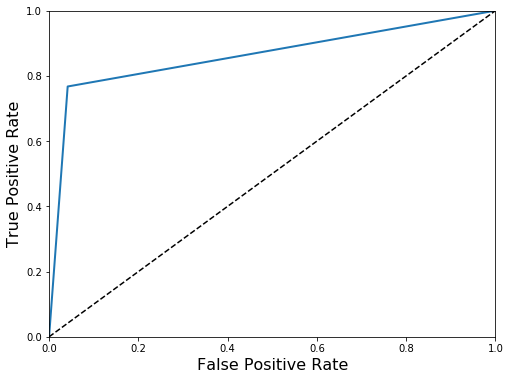

In [46]:
fpr, tpr, thresholds = roc_curve(testy, assign)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
print('\nfor train auc:')
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [47]:
confusion_matrix(testy, assign)

array([[69,  3],
       [10, 33]])

#### Spectral Clustering

In [48]:
te_accuray=[]
te_precision=[]
te_recall=[]
te_roc=[]
te_fscore=[]

for i in range(30):
    pos_train,pos_test=train_test_split(pos,test_size=0.2,random_state=42)
    pos_trainx=pos_train.iloc[:,2:]
    pos_trainy=pos_train.iloc[:,1]
    pos_testx=pos_test.iloc[:,2:]
    pos_testy=pos_test.iloc[:,1]

    neg_train,neg_test=train_test_split(neg,test_size=0.2,random_state=42)
    neg_trainx=neg_train.iloc[:,2:]
    neg_trainy=neg_train.iloc[:,1]
    neg_testx=neg_test.iloc[:,2:]
    neg_testy=neg_test.iloc[:,1]

    #concat
    testx=pd.concat([pos_testx,neg_testx])
    testy=pd.concat([pos_testy,neg_testy])
    trainx=pd.concat([pos_trainx,neg_trainx])
    trainy=pd.concat([pos_trainy,neg_trainy])

    # Normalize data
    transformer = Normalizer().fit(trainx)
    trainx=transformer.transform(trainx)
    testx=transformer.transform(testx)
    
    sclf=SpectralClustering(n_clusters=2,  gamma=1.0, affinity='rbf').fit(trainx)
    label=sclf.fit_predict(trainx)
    
    close_0=[]
    close_1=[]
    for i in enumerate(label.tolist()):
        if i[1]==1:
            close_1.append(i[0])
        if i[1]==0:
            close_0.append(i[0])
    
    
    # Majority poll for true label 0-M,1-B
    trainy=pd.DataFrame(trainy)
    c_0=trainy.loc[close_0,:]
    majority=c_0.groupby(1).size()
    if majority["B"]> majority["M"]:
        c0='B'
    else:
        c0='M'
        
    c_1=trainy.loc[close_1,:]
    majority=c_1.groupby(1).size()
    if majority["B"]> majority["M"]:
        c1='B'
    else:
        c1='M'
            
    assign=pd.DataFrame(label).replace({0:c0,1:c1})      
    trainy=trainy.replace({'M':1,'B':-1})
    assign=assign.replace({'M':1,'B':-1})
    
    te_accuray.append(1-hamming_loss(trainy, assign))
    te_precision.append(average_precision_score(trainy, assign))
    te_recall.append(recall_score(trainy, assign, average='macro'))
    te_fscore.append(f1_score(trainy, assign, average='macro'))
    te_roc.append(roc_auc_score(trainy, assign))

print('for train:')
print('te_accuray :',np.mean(te_accuray))
print('te_precision :',np.mean(te_precision))
print('te_recall :',np.mean(te_recall))
print('te_roc :',np.mean(te_roc))
print('te_fscore :',np.mean(te_fscore))
        
    

for train:
te_accuray : 0.8788546255506612
te_precision : 0.7895374449339205
te_recall : 0.8408906882591091
te_roc : 0.8408906882591091
te_fscore : 0.8604177963117209


In [49]:
te_accuray=[]
te_precision=[]
te_recall=[]
te_roc=[]
te_fscore=[]

for i in range(30):
    pos_train,pos_test=train_test_split(pos,test_size=0.2,random_state=42)
    pos_trainx=pos_train.iloc[:,2:]
    pos_trainy=pos_train.iloc[:,1]
    pos_testx=pos_test.iloc[:,2:]
    pos_testy=pos_test.iloc[:,1]

    neg_train,neg_test=train_test_split(neg,test_size=0.2,random_state=42)
    neg_trainx=neg_train.iloc[:,2:]
    neg_trainy=neg_train.iloc[:,1]
    neg_testx=neg_test.iloc[:,2:]
    neg_testy=neg_test.iloc[:,1]

    #concat
    testx=pd.concat([pos_testx,neg_testx])
    testy=pd.concat([pos_testy,neg_testy])
    trainx=pd.concat([pos_trainx,neg_trainx])
    trainy=pd.concat([pos_trainy,neg_trainy])

    # Normalize data
    transformer = Normalizer().fit(trainx)
    trainx=transformer.transform(trainx)
    testx=transformer.transform(testx)
    
    sclf=SpectralClustering(n_clusters=2,  gamma=1.0, affinity='rbf').fit(trainx)
    label=sclf.fit_predict(testx)
    
    # find closest 30 data points to each cluster center.
    close_0=[]
    close_1=[]
    for i in enumerate(label.tolist()):
        if i[1]==1:
            close_1.append(i[0])
        if i[1]==0:
            close_0.append(i[0])
    
    
    # Majority poll for true label 0-M,1-B
    trainy=pd.DataFrame(testy)
    c_0=trainy.loc[close_0,:]
    majority=c_0.groupby(1).size()
    if majority["B"]> majority["M"]:
        c0='B'
    else:
        c0='M'
        
    c_1=trainy.loc[close_1,:]
    majority=c_1.groupby(1).size()
    if majority["B"]> majority["M"]:
        c1='B'
    else:
        c1='M'
            
    assign=pd.DataFrame(label).replace({0:c0,1:c1})      
    trainy=trainy.replace({'M':1,'B':-1})
    assign=assign.replace({'M':1,'B':-1})
    
    te_accuray.append(1-hamming_loss(trainy, assign))
    te_precision.append(average_precision_score(trainy, assign))
    te_recall.append(recall_score(trainy, assign, average='macro'))
    te_fscore.append(f1_score(trainy, assign, average='macro'))
    te_roc.append(roc_auc_score(trainy, assign))

print('for test:')
print('te_accuray :',np.mean(te_accuray))
print('te_precision :',np.mean(te_precision))
print('te_recall :',np.mean(te_recall))
print('te_roc :',np.mean(te_roc))
print('te_fscore :',np.mean(te_fscore))
        
    

for test:
te_accuray : 0.9304347826086957
te_precision : 0.8529603415346588
te_recall : 0.9303940568475456
te_roc : 0.9303940568475455
te_fscore : 0.9263764404609478
